In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/clean/opensky_asia_features.csv')
df.head()

,timestamp,icao24,callsign,latitude,longitude,baro_altitude,velocity,vertical_rate,true_track,on_ground,...,delta_time,prev_lat,prev_lon,distance_delta,prev_velocity,acceleration,prev_track,turn_rate,climb_phase,speed_bucket
0,2026-02-13 16:55:00,0100a2,MSR5060,30.8654,30.4872,9197.34,212.92,7.15,321.97,False,...,17.0,30.8237,30.5251,5881.473473,213.33,-0.024118,322.05,-0.004706,1,cruise
1,2026-02-13 16:55:05,0100a2,MSR5060,30.8687,30.4843,9212.58,212.92,7.15,321.97,False,...,5.0,30.8654,30.4872,459.631153,212.92,0.000000,321.97,0.000000,1,cruise
2,2026-02-13 16:55:34,0100a2,MSR5060,30.9144,30.4426,9273.54,219.83,0.00,321.84,False,...,29.0,30.8687,30.4843,6454.113841,212.92,0.238276,321.97,-0.004483,-1,cruise
3,2026-02-13 16:55:47,0100a2,MSR5060,30.9368,30.4223,9349.74,220.64,7.80,322.01,False,...,13.0,30.9144,30.4426,3154.898925,219.83,0.062308,321.84,0.013077,1,cruise
4,2026-02-13 16:55:57,0100a2,MSR5060,30.9527,30.4078,9433.56,219.51,9.75,321.95,False,...,10.0,30.9368,30.4223,2244.560185,220.64,-0.113000,322.01,-0.006000,1,cruise


In [9]:
df.columns

Index(['timestamp', 'icao24', 'callsign', 'latitude', 'longitude',
       'baro_altitude', 'velocity', 'vertical_rate', 'true_track', 'on_ground',
       'track_sin', 'track_cos', 'delta_time', 'prev_lat', 'prev_lon',
       'distance_delta', 'prev_velocity', 'acceleration', 'prev_track',
       'turn_rate', 'climb_phase', 'speed_bucket'],
      dtype='object')

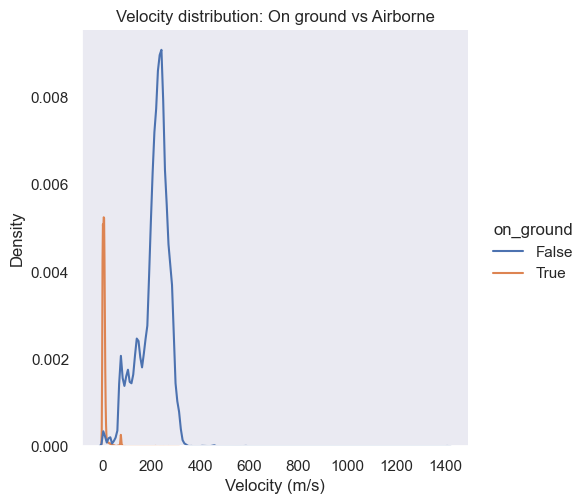

In [7]:
import seaborn as sns
sns.set_theme(style='dark')
sns.displot(df, x='velocity', hue='on_ground', kind='kde')
plt.xlabel('Velocity (m/s)')
plt.title("Velocity distribution: On ground vs Airborne")
plt.show()

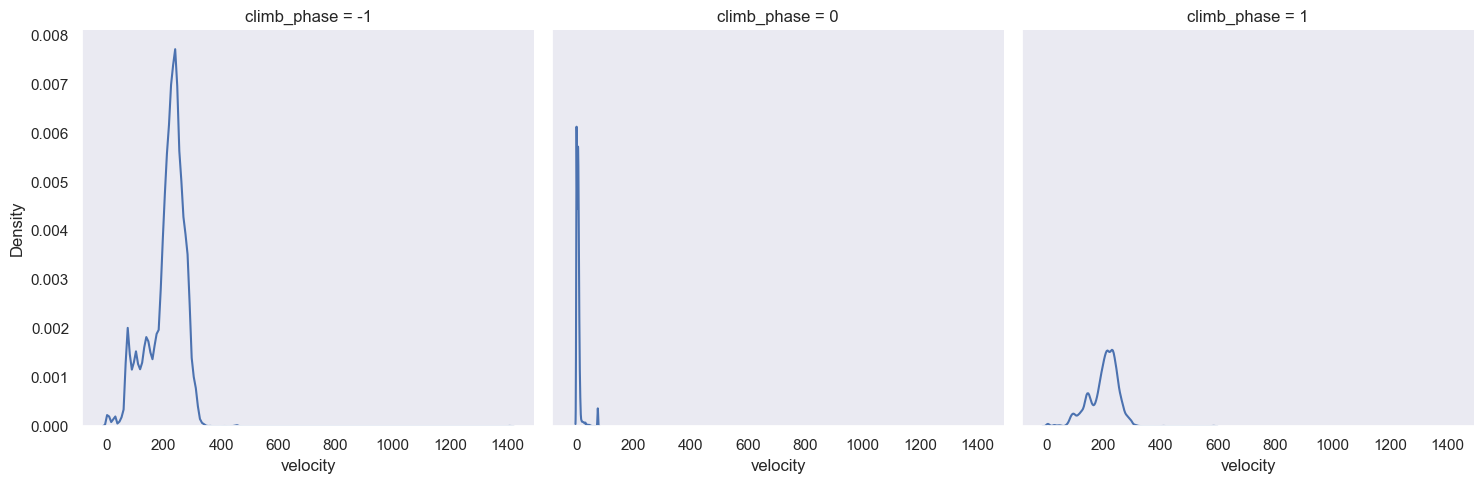

In [ ]:
sns.displot(
    data=df, x="velocity", col="climb_phase",
    kind="kde"
)
plt.show()


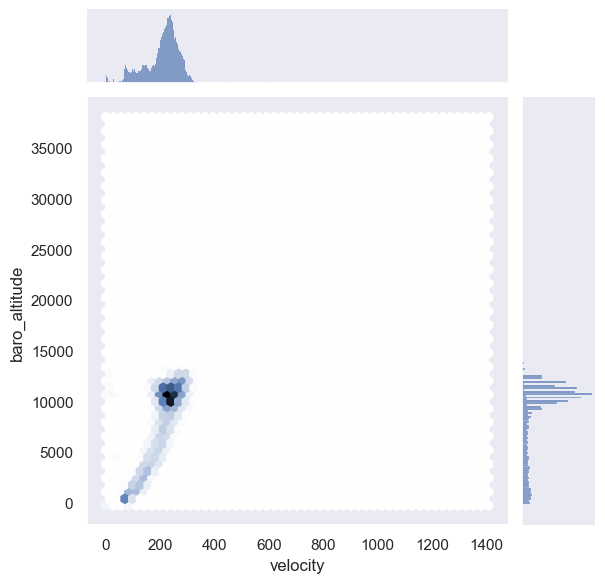

In [12]:
sns.jointplot(
    data=df.sample(200_000, random_state=42),
    x="velocity",
    y="baro_altitude",
    kind="hex",
    height=6
)

plt.show()


In [17]:
bins = [0, 5, 50, 100, 150, 200, 250, 300]
labels = [
    "0–5 (parked)",
    "5–50 (taxi)",
    "50–100 (low-speed)",
    "100–150 (climb/descent)",
    "150–200 (cruise-low)",
    "200–250 (cruise)",
    "250–300 (fast cruise)"
]

df["velocity_bin"] = pd.cut(df["velocity"], bins=bins, labels=labels)

df["velocity_bin"].value_counts().sort_index()

velocity_bin
0–5 (parked)                27161
5–50 (taxi)                 37985
50–100 (low-speed)          67180
100–150 (climb/descent)    100428
150–200 (cruise-low)       148932
200–250 (cruise)           423755
250–300 (fast cruise)      221674
Name: count, dtype: int64

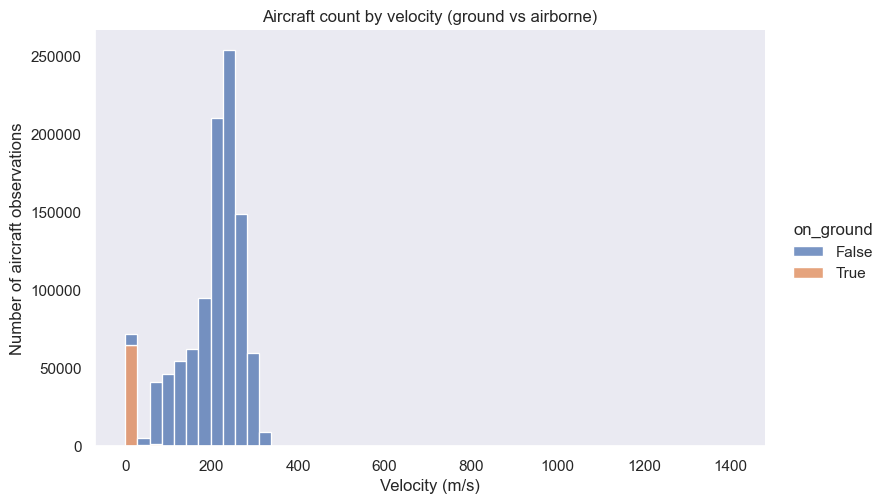

In [18]:
sns.displot(
    data=df,
    x="velocity",
    hue="on_ground",
    bins=50,
    stat="count",
    multiple="stack",
    height=5,
    aspect=1.6
)

plt.xlabel("Velocity (m/s)")
plt.ylabel("Number of aircraft observations")
plt.title("Aircraft count by velocity (ground vs airborne)")
plt.show()

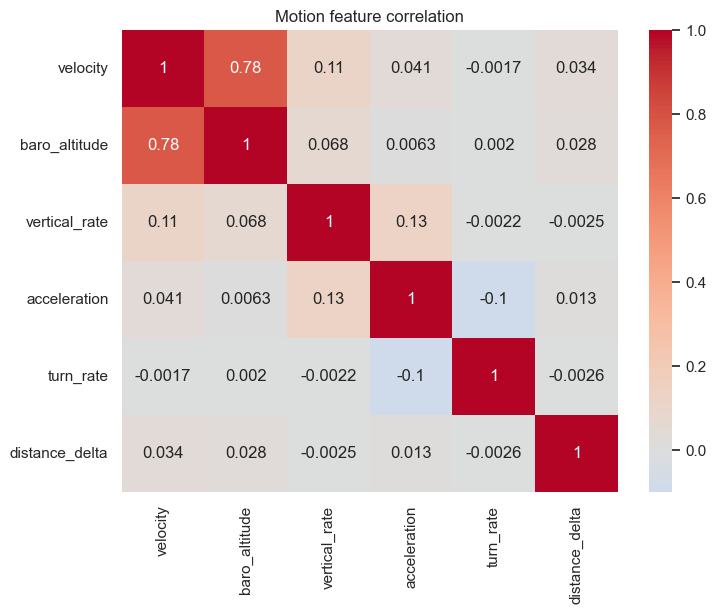

In [16]:
features = [
    "velocity",
    "baro_altitude",
    "vertical_rate",
    "acceleration",
    "turn_rate",
    "distance_delta"
]

corr = df[features].sample(200_000, random_state=42).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Motion feature correlation")
plt.show()